In [1]:
import polars as pl
import glob
import matplotlib.pyplot as plt

In [2]:
# gathering off all parquet files

all_files = glob.glob("/Users/nicky/Documents/jane_street_kaggle/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=*/part-0.parquet")
print('files: ',all_files)

files:  ['/Users/nicky/Documents/jane_street_kaggle/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=1/part-0.parquet', '/Users/nicky/Documents/jane_street_kaggle/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=6/part-0.parquet', '/Users/nicky/Documents/jane_street_kaggle/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=8/part-0.parquet', '/Users/nicky/Documents/jane_street_kaggle/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=9/part-0.parquet', '/Users/nicky/Documents/jane_street_kaggle/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=7/part-0.parquet', '/Users/nicky/Documents/jane_street_kaggle/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=0/part-0.parquet', '/Users/nicky/Documents/jane_street_kaggle/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=5/part-0.parquet', '/Users/nicky/Documents/jane_street_kaggle/jan

In [3]:
df_list = [pl.scan_parquet(f) for f in all_files]

In [4]:
df_lazy = pl.concat(df_list)

In [5]:
df_lazy

In [6]:
df_eager = df_lazy.collect()
print("shape of dataframe: ", df_eager.shape)

shape of dataframe:  (47127338, 92)


In [7]:
df_eager

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
170,0,0,2.112212,null,null,null,null,null,1.06033,1.515157,0.352634,-0.447763,11,7,76,-1.228861,0.008213,-0.601484,null,0.351496,null,-0.978721,-1.554902,0.674201,null,0.977276,0.720687,-1.718944,-0.776792,null,null,1.29821,-0.62246,0.129845,null,null,…,-0.299809,null,null,-0.467334,null,-1.898299,1.3534,null,0.741728,0.381551,-0.111088,null,null,null,null,null,-1.04617,0.287551,-0.465869,-1.249266,-0.353061,-0.944552,null,null,-0.218977,-0.304388,-0.272583,-0.421823,-0.293646,-0.061842,-0.305413,-0.419151,-0.111796,-0.535104,-0.044332,-0.039061,-0.744789
170,0,1,2.760715,null,null,null,null,null,0.482468,1.184037,0.171099,-0.247298,11,7,76,-1.369109,-0.025435,-0.572019,null,0.333387,null,-2.336337,-1.804332,0.482041,null,1.496122,1.238685,-1.272945,-0.684054,null,null,1.984172,-0.74895,-0.019552,null,null,…,1.294006,null,null,-1.759731,null,-1.509075,1.277347,null,0.848605,0.271178,-0.111088,null,0.031604,-0.032718,null,null,-1.176612,0.035019,-0.675795,-1.018252,-0.092218,-0.677779,null,null,2.050337,1.861158,3.105997,3.111076,-0.075267,-0.35936,-1.270054,-0.018332,-0.040286,-1.417509,0.08584,0.487232,-0.124533
170,0,2,1.813596,null,null,null,null,null,1.020798,1.318752,0.398088,-0.247506,81,2,59,-1.202441,0.126689,-0.667604,null,1.618193,null,-1.923313,-1.489799,-0.390187,null,0.371769,-0.122028,-2.06938,-0.464404,null,null,0.847595,-0.523469,-0.272637,null,null,…,3.095362,null,null,0.71818,null,0.091084,2.605218,null,10.869972,4.77036,-0.111088,null,null,null,null,null,-0.637841,0.174133,-0.369733,-0.490952,0.059585,-0.718498,null,null,3.343488,3.53905,0.274703,0.458474,-5.0,-5.0,0.194658,-5.0,-5.0,-5.0,1.5834,0.018712,-1.055035
170,0,3,0.926893,null,null,null,null,null,0.510098,0.645825,0.198428,-0.129691,4,3,11,-0.929123,-0.270122,-0.640521,null,0.086395,null,-1.066588,-1.175161,0.556984,null,-0.997101,-1.189861,-0.531423,1.408923,null,null,-0.964718,-0.776983,-0.565667,null,null,…,1.154819,null,null,1.10903,null,-1.734428,3.41465,null,-0.423668,-0.348209,-0.111088,6.384581,6.073787,4.517715,null,null,-0.972576,-0.128628,-0.793227,-0.979003,-0.456904,-0.686736,null,null,8.123117,11.267688,19.623468,17.805511,3.336086,2.051951,2.400644,0.96273,-0.939277,1.84587,-2.372452,-1.663179,-4.585349
170,0,7,1.665231,null,null,null,null,null,0.547458,1.009267,0.178444,-0.172451,11,7,76,-1.020558,0.547238,-0.84024,null,0.391496,null,-0.740257,-1.530828,1.008969,null,0.391344,0.294957,-0.790029,0.598666,null,null,0.497302,0.191926,0.424843,null,null,…,-0.453015,null,null,-1.365918,null,-3.010155,0.836071,null,-0.977714,-0.479147,-0.111088,null,null,null,null,null,-1.098084,1.055543,-0.405248,-0.75879,-0.207848,-0.778523,null,null,-0.167989,-0.118553,-0.260789,-0.249322,-0.707027,-0.344866,-1.248052,-0.129645,-3.145927,-0.452708,0.300044,0.489202,0.242737
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…

In [8]:
null_counts = df_eager.select([pl.all().null_count()])
print(null_counts)

shape: (1, 92)
┌─────────┬─────────┬───────────┬────────┬───┬─────────────┬─────────────┬────────────┬────────────┐
│ date_id ┆ time_id ┆ symbol_id ┆ weight ┆ … ┆ responder_5 ┆ responder_6 ┆ responder_ ┆ responder_ │
│ ---     ┆ ---     ┆ ---       ┆ ---    ┆   ┆ ---         ┆ ---         ┆ 7          ┆ 8          │
│ u32     ┆ u32     ┆ u32       ┆ u32    ┆   ┆ u32         ┆ u32         ┆ ---        ┆ ---        │
│         ┆         ┆           ┆        ┆   ┆             ┆             ┆ u32        ┆ u32        │
╞═════════╪═════════╪═══════════╪════════╪═══╪═════════════╪═════════════╪════════════╪════════════╡
│ 0       ┆ 0       ┆ 0         ┆ 0      ┆ … ┆ 0           ┆ 0           ┆ 0          ┆ 0          │
└─────────┴─────────┴───────────┴────────┴───┴─────────────┴─────────────┴────────────┴────────────┘


In [9]:
df_eager.select(pl.all().null_count())

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,3182052,3182052,3182052,3182052,3182052,0,0,0,300247,0,0,0,0,0,0,1209299,261,201838,226,226,0,8435985,0,0,0,0,8435985,8435985,0,0,0,8435985,478457,…,13805,1044898,4254098,13805,1044898,226,226,478452,0,0,0,292827,227566,237663,317163,317163,0,0,0,0,0,0,483759,483759,58430,58430,20043,20043,0,0,0,0,0,0,0,0,0


In [10]:
# each symbol_id represents a financial asset. So if we imagine it is a stock. Let's see how many unique stocks there are in the 47M rows
unique_symbol_id = df_eager.select(pl.col('symbol_id').unique())
print(unique_symbol_id)

shape: (39, 1)
┌───────────┐
│ symbol_id │
│ ---       │
│ i8        │
╞═══════════╡
│ 0         │
│ 1         │
│ 2         │
│ 3         │
│ 4         │
│ …         │
│ 34        │
│ 35        │
│ 36        │
│ 37        │
│ 38        │
└───────────┘


There about 38 financial instruments in the dataset. 

I have noticed that the features seem to be similar to percent changes. If so, this can mean that they are some kind of changes in the finanical instrument. This could be price, volumes, price, etc etc. There is no way of knowing which is which value.

In [11]:
# assuming each feature column is somekind of percent change. I am going to use interpolation to fill in the blanks using the polars built in interpolation function

In [12]:
df_interpolated = df_eager.with_columns(
    [pl.col(c).interpolate() 
     for c in df_eager.select(pl.all().exclude(pl.Utf8)).columns]
)

In [13]:
df_interpolated.select(pl.all().null_count())

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,1237842,1237842,1237842,1237842,1237842,0,0,0,0,0,0,0,0,0,0,456,0,76,0,0,0,2804247,0,0,0,0,2804247,2804247,0,0,0,2804247,171,…,0,342,1292,0,342,0,0,171,0,0,0,3,1,1,14,14,0,0,0,0,0,0,171,171,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_interpolated

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
f64,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f64,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
170.0,0.0,0.0,2.112212,null,null,null,null,null,1.06033,1.515157,0.352634,-0.447763,11.0,7.0,76.0,-1.228861,0.008213,-0.601484,null,0.351496,null,-0.978721,-1.554902,0.674201,null,0.977276,0.720687,-1.718944,-0.776792,null,null,1.29821,-0.62246,0.129845,null,null,…,-0.299809,null,null,-0.467334,null,-1.898299,1.3534,null,0.741728,0.381551,-0.111088,null,null,null,null,null,-1.04617,0.287551,-0.465869,-1.249266,-0.353061,-0.944552,null,null,-0.218977,-0.304388,-0.272583,-0.421823,-0.293646,-0.061842,-0.305413,-0.419151,-0.111796,-0.535104,-0.044332,-0.039061,-0.744789
170.0,0.0,1.0,2.760715,null,null,null,null,null,0.482468,1.184037,0.171099,-0.247298,11.0,7.0,76.0,-1.369109,-0.025435,-0.572019,null,0.333387,null,-2.336337,-1.804332,0.482041,null,1.496122,1.238685,-1.272945,-0.684054,null,null,1.984172,-0.74895,-0.019552,null,null,…,1.294006,null,null,-1.759731,null,-1.509075,1.277347,null,0.848605,0.271178,-0.111088,null,0.031604,-0.032718,null,null,-1.176612,0.035019,-0.675795,-1.018252,-0.092218,-0.677779,null,null,2.050337,1.861158,3.105997,3.111076,-0.075267,-0.35936,-1.270054,-0.018332,-0.040286,-1.417509,0.08584,0.487232,-0.124533
170.0,0.0,2.0,1.813596,null,null,null,null,null,1.020798,1.318752,0.398088,-0.247506,81.0,2.0,59.0,-1.202441,0.126689,-0.667604,null,1.618193,null,-1.923313,-1.489799,-0.390187,null,0.371769,-0.122028,-2.06938,-0.464404,null,null,0.847595,-0.523469,-0.272637,null,null,…,3.095362,null,null,0.71818,null,0.091084,2.605218,null,10.869972,4.77036,-0.111088,null,3.052696,2.242498,null,null,-0.637841,0.174133,-0.369733,-0.490952,0.059585,-0.718498,null,null,3.343488,3.53905,0.274703,0.458474,-5.0,-5.0,0.194658,-5.0,-5.0,-5.0,1.5834,0.018712,-1.055035
170.0,0.0,3.0,0.926893,null,null,null,null,null,0.510098,0.645825,0.198428,-0.129691,4.0,3.0,11.0,-0.929123,-0.270122,-0.640521,null,0.086395,null,-1.066588,-1.175161,0.556984,null,-0.997101,-1.189861,-0.531423,1.408923,null,null,-0.964718,-0.776983,-0.565667,null,null,…,1.154819,null,null,1.10903,null,-1.734428,3.41465,null,-0.423668,-0.348209,-0.111088,6.384581,6.073787,4.517715,null,null,-0.972576,-0.128628,-0.793227,-0.979003,-0.456904,-0.686736,null,null,8.123117,11.267688,19.623468,17.805511,3.336086,2.051951,2.400644,0.96273,-0.939277,1.84587,-2.372452,-1.663179,-4.585349
170.0,0.0,7.0,1.665231,null,null,null,null,null,0.547458,1.009267,0.178444,-0.172451,11.0,7.0,76.0,-1.020558,0.547238,-0.84024,null,0.391496,null,-0.740257,-1.530828,1.008969,null,0.391344,0.294957,-0.790029,0.598666,null,null,0.497302,0.191926,0.424843,null,null,…,-0.453015,null,null,-1.365918,null,-3.010155,0.836071,null,-0.977714,-0.479147,-0.111088,5.53134,5.628678,4.14362,null,null,-1.098084,1.055543,-0.405248,-0.75879,-0.207848,-0.778523,null,null,-0.167989,-0.118553,-0.260789,-0.249322,-0.707027,-0.344866,-1.248052,-0.129645,-3.145927,-0.452708,0.300044,0.489202,0.242737
…,…,…,…,…,…,

In my dataset I have a date_id and time_id that is just represented by an index. I want to grab every symbol_id in column symbol id, grab one feature which is 

In [14]:
df_with_returns = df_interpolated.with_columns(
    (
        pl.col('feature_06')/pl.col('feature_06').shift(1).over('symbol_id')-1
    ).alias('return_6')
)

In [15]:
# now that returns are calculated we can convert to pandas and then plot

df_pivot = df_with_returns.pivot(
    index=['date_id','time_id'],
    columns = 'symbol_id',
    values='return_6'

).sort(['date_id','time_id'])

/var/folders/bt/k7k7p1v13zj58gz6d_hm5_0r0000gn/T/ipykernel_82269/2636029636.py:3: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  df_pivot = df_with_returns.pivot(


In [16]:
#double checking wide format
df_pivot

date_id,time_id,0.0,1.0,2.0,3.0,7.0,8.0,9.0,10.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,30.0,33.0,34.0,38.0,11.0,4.0,5.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,28.0,29.0,31.0,35.0,36.0,37.0,27.0,6.0,18.0,32.0
f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0.0,0.0,null,-1.452668,null,null,-1.223401,null,-1.282785,-1.29238,null,null,-1.35407,null,-1.40793,null,-1.22588,null,-1.29423,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
0.0,1.0,null,-2.651954,null,null,-2.675922,null,-1.978726,-2.695778,null,null,-2.4495,null,-2.476688,null,-2.653369,null,-2.346251,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
0.0,2.0,null,-1.413205,null,null,-1.550333,null,-1.923155,-1.536377,null,null,-1.774397,null,-1.677378,null,-1.536857,null,-1.761563,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
0.0,3.0,null,0.747341,null,null,0.80803,null,-0.010794,0.186582,null,null,-0.23228,null,0.105554,null,0.130987,null,0.042307,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
0.0,4.0,null,0.499158,null,null,0.265536,null,1.562321,0.384272,null,null,0.576349,null,0.037487,null,0.733393,null,0.739478,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1698.0,963.0,-0.56005,-0.605211,-0.51336,-0.593922,-0.480522,-0.658399,-0.638067,-0.285153,-0.582673,-0.60081,-0.623275,-0.737704,-0.683725,-0.776104,-0.463895,-0.205241,-0.5329,-0.715344,-0.47473,-0.614994,-0.56111,-0.516391,-0.498773,-0.376931,-0.655296,-0.159704,0.385234,-0.527615,-0.493038,-0.666899,0.032948,-0.392246,-0.42428,-0.020997,-0.344252,-0.543057,-0.163006,-0.481511,-0.750219
1698.0,964.0,-0.061661,-0.028853,0.147825,0.014774,-0.022305,0.233658,0.585525,-0.489828,0.160919,0.120525,0.142525,0.240407,0.447371,0.476959,0.005754,-0.240137,0.162372,0.148294,0.046216,0.272591,0.08603,-0.265565,-0.222645,0.051041,0.194231,-0.219984,0.203385,-0.154486,0.408345,0.785825,-0.208944,-0.101383,-0.196811,0.015909,0.201077,0.070976,-0.127328,0.020308,0.591758
1698.0,965.0,5.775981,8.530155,5.482574,8.958581,6.732046,3.644403,8.759019,9.40033,8.307351,5.990699,6.605769,10.054734,5.499877,11.530487,4.824679,7.794745,4.316527,10.313141,8.129962,8.94189,6.358317,8.562777,9.328879,4.207736,7.250314,3.729787,5.96534,7.551259,8.957521,8.79318,10.651254,8.875682,6.797864,5.038755,6.965204,6.755162,7.38461,5.759908,10.311994


In [17]:
pdf_pivot = df_pivot.to_pandas()

In [18]:
# Combine date_id/time_id into a single string or numeric index for plotting

pdf_pivot['datetime_index'] = pdf_pivot[['date_id','time_id']].astype(str).agg('_'.join,axis=1)
pdf_pivot.set_index('datetime_index',inplace=True)

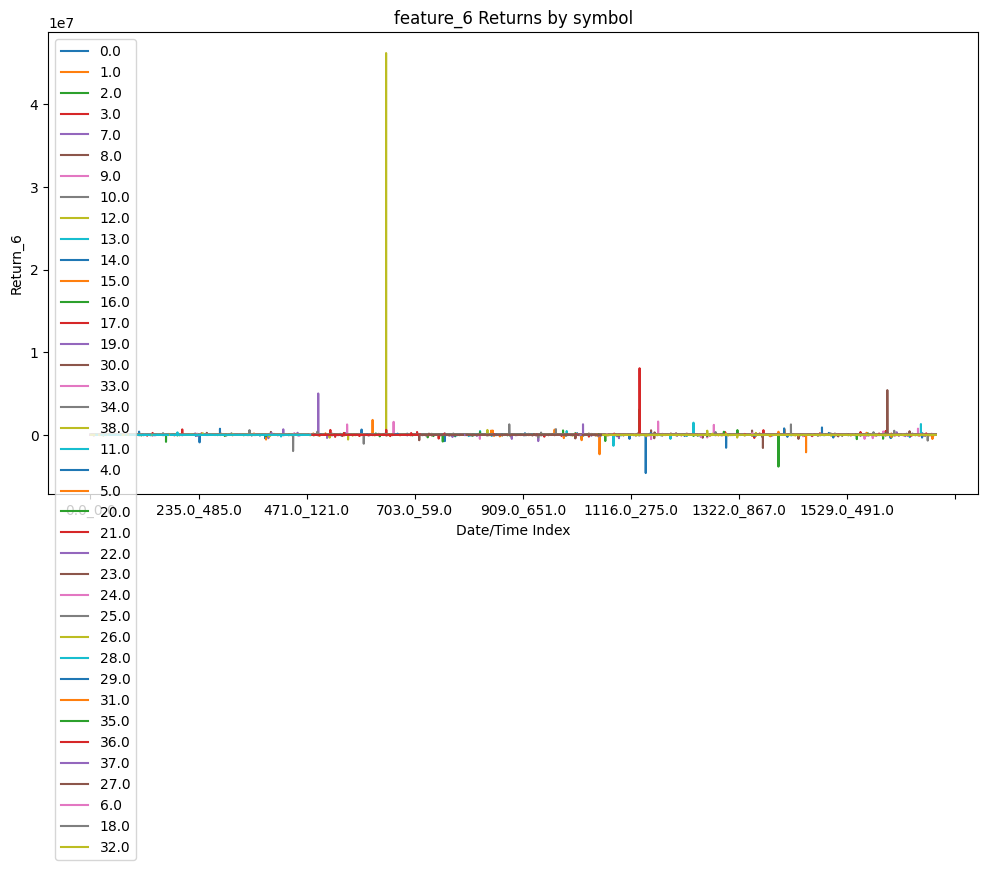

In [21]:
pdf_pivot.drop(['date_id','time_id'],axis=1).plot(figsize=(12,6))
plt.title('feature_6 Returns by symbol')
plt.xlabel('Date/Time Index')
plt.ylabel('Return_6')
plt.show()

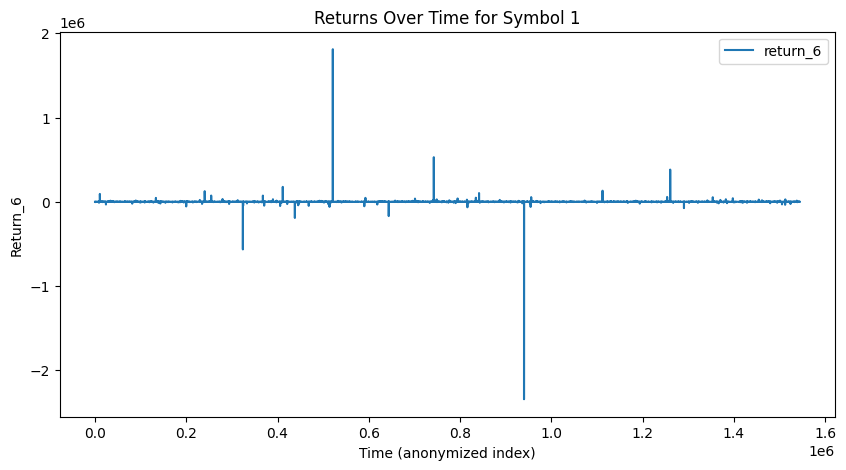

In [20]:
# 1. Pick your desired symbol
desired_symbol = 1  # or 'AAPL', depending on how symbol_id is stored

# 2. Filter to only that symbol and 3. sort by (date_id, time_id)
df_one_symbol = (
    df_with_returns
    .filter(pl.col("symbol_id") == desired_symbol)
    .sort(["date_id", "time_id"])
)

# 4. Convert to Pandas
pdf_one_symbol = df_one_symbol.to_pandas()

# 5. Create a numeric "time_index" if needed:
pdf_one_symbol["time_index"] = range(len(pdf_one_symbol))

# 6. Plot returns vs. time_index
plt.figure(figsize=(10, 5))
plt.plot(pdf_one_symbol["time_index"], pdf_one_symbol["return_6"], label="return_6")
plt.title(f"Returns Over Time for Symbol {desired_symbol}")
plt.xlabel("Time (anonymized index)")
plt.ylabel("Return_6")
plt.legend()
plt.show()

Given that each column is probably a stock and its returns, I assumed that we could use a clustering algorithm in order to find patterns to predict feature 6.

1. Data Preparation with Polars
	1.	Read the training files (train.parquet partitions and possibly lags.parquet).
	2.	Combine them so each row has its feature_* columns, plus the necessary target (responder_6) and (optionally) the previous day’s responder_6 from lags.parquet.
	3.	Handle Missing Values (you mentioned you’ve already done some interpolation). You might keep it or refine it if needed.
	4.	Potentially Convert symbol_id to a categorical (e.g., integer encoding) if your modeling framework can handle categories or embeddings.
